In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [73]:
import pandas as pd;
train = pd.read_csv('../input/zindi-aizrport/Train (1).csv')
test = pd.read_csv('../input/zindi-aizrport/Test.csv');
ss = pd.read_csv('../input/zindi-aizrport/SampleSubmission (1).csv')

In [74]:
import numpy as np
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.impute import SimpleImputer;
from sklearn.compose import ColumnTransformer;
from sklearn.pipeline import Pipeline;
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression ;
from sklearn.linear_model import LogisticRegression;
from sklearn.linear_model import Ridge, Lasso;
from sklearn.metrics import mean_squared_error;
from sklearn.metrics import r2_score;
from sklearn.preprocessing import PolynomialFeatures;
from sklearn.svm import SVR;
from sklearn.svm import SVC;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.tree import DecisionTreeRegressor;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.ensemble import RandomForestRegressor;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.neighbors import KNeighborsRegressor;
from sklearn.naive_bayes import GaussianNB;
import xgboost as xgb;
from xgboost import XGBClassifier;
from xgboost import XGBRegressor;

import tensorflow as tf
import keras;
from keras_preprocessing import image;
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam;
from keras.callbacks import ModelCheckpoint;
from keras.models import Sequential;
from tensorflow.keras.applications import VGG16;
from tensorflow.keras.applications import InceptionResNetV2;
from keras.applications.vgg16 import preprocess_input;
from tensorflow.keras.applications.vgg16 import decode_predictions;
from tensorflow.keras.callbacks import EarlyStopping;


In [75]:
train.shape, test.shape, ss.shape

((107833, 10), (9333, 9), (9333, 2))

In [76]:
train.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [77]:
train['STD'] = pd.to_datetime(train['STD'])
train['DATOP'] = pd.to_datetime(train['DATOP'])
train.head(10)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18.15.00,ATA,TU 736IOP,53.0
6,train_id_6,2016-01-18,TU 0514,TUN,BCN,2016-01-18 07:15:00,2016-01-18 09.00.00,ATA,TU 32AIMH,10.0
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09.55.00,ATA,TU 32AIMI,15.0
8,train_id_8,2016-01-18,TU 0752,TUN,FCO,2016-01-18 07:40:00,2016-01-18 09.00.00,ATA,TU 32AIMC,16.0
9,train_id_9,2016-01-18,TU 0996,TUN,NCE,2016-01-18 07:45:00,2016-01-18 09.15.00,ATA,TU 31AIMK,21.0


In [78]:
test['STD'] = pd.to_datetime(test['STD'])
test['DATOP'] = pd.to_datetime(test['DATOP'])

In [79]:
train['STDminutes'] = train['STD'].dt.hour * 60 + train['STD'].dt.minute + train['STD'].dt.second/60;
test['STDminutes'] = test['STD'].dt.hour * 60 + test['STD'].dt.minute + test['STD'].dt.second/60
train.head(10)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,STDminutes
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,630.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,905.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,250.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,850.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,870.0
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18.15.00,ATA,TU 736IOP,53.0,980.0
6,train_id_6,2016-01-18,TU 0514,TUN,BCN,2016-01-18 07:15:00,2016-01-18 09.00.00,ATA,TU 32AIMH,10.0,435.0
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09.55.00,ATA,TU 32AIMI,15.0,455.0
8,train_id_8,2016-01-18,TU 0752,TUN,FCO,2016-01-18 07:40:00,2016-01-18 09.00.00,ATA,TU 32AIMC,16.0,460.0
9,train_id_9,2016-01-18,TU 0996,TUN,NCE,2016-01-18 07:45:00,2016-01-18 09.15.00,ATA,TU 31AIMK,21.0,465.0


In [80]:
train['STDyear']= train['STD'].dt.year
train['STDmonth']= train['STD'].dt.month
train['STDday']= train['STD'].dt.day

train['DATOPyear']= train['DATOP'].dt.year
train['DATOPmonth']= train['DATOP'].dt.month
train['DATOPday']= train['DATOP'].dt.day

In [81]:
le = LabelEncoder()

In [82]:
train['STDyear'] = le.fit_transform(train['STDyear']);
train['STDmonth'] = le.fit_transform(train['STDmonth']);
train['STDday'] = le.fit_transform(train['STDday'])

train['DATOPyear'] = le.fit_transform(train['DATOPyear']);
train['DATOPmonth'] = le.fit_transform(train['DATOPmonth']);
train['DATOPday'] = le.fit_transform(train['DATOPday'])

In [83]:
test['STDyear']= test['STD'].dt.year
test['STDmonth']= test['STD'].dt.month
test['STDday']= test['STD'].dt.day

test['DATOPyear']= test['DATOP'].dt.year
test['DATOPmonth']= test['DATOP'].dt.month
test['DATOPday']= test['DATOP'].dt.day

In [84]:
test['STDyear'] = le.fit_transform(test['STDyear']);
test['STDmonth'] = le.fit_transform(test['STDmonth']);
test['STDday'] = le.fit_transform(test['STDday'])

test['DATOPyear'] = le.fit_transform(test['DATOPyear']);
test['DATOPmonth'] = le.fit_transform(test['DATOPmonth']);
test['DATOPday'] = le.fit_transform(test['DATOPday'])

In [85]:
train['ID'] = le.fit_transform(train['ID']);
train['FLTID'] = le.fit_transform(train['FLTID']);

test['ID'] = le.fit_transform(test['ID']);
test['FLTID'] = le.fit_transform(test['FLTID']);

In [86]:
train = train.drop(columns = ['DATOP', 'STD'], axis = 1)

In [87]:
train.head()

,ID,FLTID,DEPSTN,ARRSTN,STA,STATUS,AC,target,STDminutes,STDyear,STDmonth,STDday,DATOPyear,DATOPmonth,DATOPday
0,0,230,CMN,TUN,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,630.0,0,0,2,0,0,2
1,1,257,MXP,TUN,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,905.0,0,0,12,0,0,12
2,18945,86,TUN,IST,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,250.0,0,0,15,0,0,15
3,30056,164,DJE,NTE,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,850.0,0,0,16,0,0,16
4,41167,136,TUN,ALG,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,870.0,0,0,16,0,0,16


In [88]:
test = test.drop(columns = ['DATOP', 'STD'], axis = 1)

In [89]:
test.head()

,ID,FLTID,DEPSTN,ARRSTN,STA,STATUS,AC,STDminutes,STDyear,STDmonth,STDday,DATOPyear,DATOPmonth,DATOPday
0,0,124,DJE,TUN,2016-05-04 07.30.00,ATA,TU 32AIMF,400.0,0,1,3,0,1,3
1,1,53,TUN,BKO,2016-05-05 20.05.00,ATA,TU 320IMW,920.0,0,1,4,0,1,4
2,1112,151,FRA,TUN,2016-05-06 12.25.00,ATA,TU 32AIMC,600.0,0,1,5,0,1,5
3,2223,172,BEY,TUN,2016-05-11 13.10.00,ATA,TU 31BIMO,580.0,0,1,10,0,1,10
4,3334,109,ORY,MIR,2016-05-11 12.35.00,ATA,TU 736IOQ,590.0,0,1,10,0,1,10


In [90]:
train['STA'] = le.fit_transform(train['STA']);
test['STA'] = le.fit_transform(test['STA']);

In [91]:
train['DEPSTN'] = le.fit_transform(train['DEPSTN']);
train['ARRSTN'] = le.fit_transform(train['ARRSTN']);
train['STATUS'] = le.fit_transform(train['STATUS']);
train['AC'] = le.fit_transform(train['AC']);

test['DEPSTN'] = le.fit_transform(test['DEPSTN']);
test['ARRSTN'] = le.fit_transform(test['ARRSTN']);
test['STATUS'] = le.fit_transform(test['STATUS']);
test['AC'] = le.fit_transform(test['AC']);

In [92]:
train.head()

,ID,FLTID,DEPSTN,ARRSTN,STA,STATUS,AC,target,STDminutes,STDyear,STDmonth,STDday,DATOPyear,DATOPmonth,DATOPday
0,0,230,31,119,173,0,46,260.0,630.0,0,0,2,0,0,2
1,1,257,86,119,849,0,28,20.0,905.0,0,0,12,0,0,12
2,18945,86,123,58,1005,0,46,0.0,250.0,0,0,15,0,0,15
3,30056,164,37,91,1122,0,50,0.0,850.0,0,0,16,0,0,16
4,41167,136,123,4,1115,0,34,22.0,870.0,0,0,16,0,0,16


In [93]:
test.head()

,ID,FLTID,DEPSTN,ARRSTN,STA,STATUS,AC,STDminutes,STDyear,STDmonth,STDday,DATOPyear,DATOPmonth,DATOPday
0,0,124,23,76,232,0,22,400.0,0,1,3,0,1,3
1,1,53,74,9,367,0,19,920.0,0,1,4,0,1,4
2,1112,151,29,76,414,0,20,600.0,0,1,5,0,1,5
3,2223,172,7,76,811,0,12,580.0,0,1,10,0,1,10
4,3334,109,62,50,806,0,37,590.0,0,1,10,0,1,10


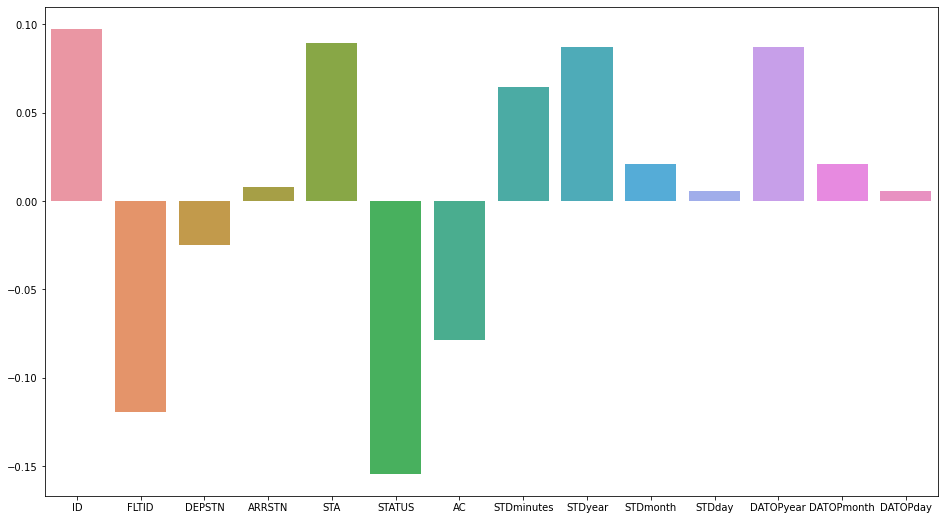

In [94]:
plt.figure(figsize = (16,9))
fineTech_appData3 = train.drop(['target'], axis = 1)
sns.barplot(fineTech_appData3.columns,fineTech_appData3.corrwith(train['target']))

In [96]:
x = train.drop(columns  = ['DEPSTN', 'ARRSTN', 'STDmonth', 'STDday', 'DATOPmonth', 'DATOPday',  'target'], axis = 1);
y = train[['target']]

In [97]:
test = test.drop(columns  = ['DEPSTN', 'ARRSTN', 'STDmonth', 'STDday', 'DATOPmonth', 'DATOPday'], axis = 1)

In [98]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 51)

In [99]:
dc = DecisionTreeRegressor();
dc.fit(xtrain, ytrain);
dc.score(xtest, ytest)

-0.7055542578339553

In [57]:
preddc  = dc.predict(test)
hehedc = pd.DataFrame({'target': preddc})
hehedc.set_index('target').to_csv('submissiondc.csv')

In [100]:
rfc = RandomForestRegressor();
rfc.fit(xtrain, ytrain);
rfc.score(xtest, ytest)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.15915285316843264

In [59]:
predrfc  = rfc.predict(test)

In [60]:
heherfc = pd.DataFrame({'target': predrfc})
heherfc.set_index('target').to_csv('submissionrfc.csv')

In [101]:
xx = XGBRegressor();
xx.fit(xtrain, ytrain);
xx.score(xtest, ytest)

0.15386419507461935

In [62]:
predxx  = xx.predict(test)
hehexx = pd.DataFrame({'target': predxx})
hehexx.set_index('target').to_csv('submissionxx.csv')

In [102]:
las  = Lasso();
las.fit(xtrain, ytrain);
las.score(xtest, ytest)

0.041237196274762855

In [66]:
predlas  = las.predict(test)
hehelas = pd.DataFrame({'target': predlas})
hehelas.set_index('target').to_csv('submissionlas1.csv')

In [67]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators= 5)
lgb.fit(xtrain,ytrain);
lgb.score(xtest, ytest)

0.059681372187233794

In [68]:
predlgb  = lgb.predict(test)
hehelgb = pd.DataFrame({'target': predlgb})
hehelgb.set_index('target').to_csv('submissionlgb4.csv')

In [69]:
knn = KNeighborsRegressor();
knn.fit(xtrain, ytrain);
knn.score(xtest, ytest)

0.0207589485194436

In [70]:
predknn  = knn.predict(test)
heheknn = pd.DataFrame({'target': predknn})
heheknn.set_index('target').to_csv('submissionknn.csv')

In [71]:
rid = Ridge();
rid.fit(xtrain, ytrain);
rid.score(xtest, ytest)

0.04207777991465356

In [72]:
predrid  = rid.predict(test)
heherid = pd.DataFrame({'target': predrid})
heherid.set_index('target').to_csv('submissionrid.csv')